In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
from pathlib import Path

# Path to your folder, not to the file
module_dir = Path('/content/gdrive/MyDrive/Python/Helper Functions')

if str(module_dir) not in sys.path:
    sys.path.append(str(module_dir))

# Import the module
from helpers import plot


In [ ]:
# import sys, importlib, os, shutil
# from pathlib import Path

# # --- Step 1: Detect environment ---
# def in_colab() -> bool:
#     try:
#         import google.colab  # type: ignore
#         return True
#     except ImportError:
#         return False

# def in_notebook() -> bool:
#     try:
#         from IPython import get_ipython
#         return bool(get_ipython())
#     except Exception:
#         return False


# # --- Step 2: Resolve base path ---
# if in_colab():
#     from google.colab import drive
#     mount_point = Path("/content/drive")
#     try:
#         # Try mounting cleanly; ignore if already mounted
#         drive.mount(str(mount_point), force_remount=False)
#     except Exception:
#         pass

#     base_path = mount_point / "MyDrive" / "Python" / "Helper Functions"
# else:
#     # Adjust this once for your local setup (Mac/PC/Linux)
#     base_path = Path("~/Library/CloudStorage/GoogleDrive-guhaa1@gmail.com/My Drive/Python/Helper Functions/helpers.py").expanduser()

# helper_file = base_path / "helpers.py"


# # --- Step 3: Handle Colab Drive FUSE issues gracefully ---
# if in_colab() and not helper_file.exists():
#     # Retry mount with force if needed
#     from google.colab import drive
#     try:
#         drive.flush_and_unmount()
#     except Exception:
#         pass
#     drive.mount(str(mount_point), force_remount=True)

# # After remount, re-check existence
# if not helper_file.exists():
#     raise FileNotFoundError(f"helpers.py not found at: {helper_file}")


# # --- Step 4: In Colab, copy to /content for reliability ---
# if in_colab():
#     local_copy = Path("/content/helpers.py")
#     shutil.copy2(helper_file, local_copy)
#     import_path = local_copy
# else:
#     import_path = helper_file


# # --- Step 5: Dynamic import / reload ---
# module_name = "helpers"
# spec = importlib.util.spec_from_file_location(module_name, str(import_path))
# helpers = importlib.util.module_from_spec(spec)
# sys.modules[module_name] = helpers
# spec.loader.exec_module(helpers)

# print(f"✅ Loaded helpers.py from {import_path}")


# # --- Step 6 (Optional): Easy reload function ---
# def reload_helpers():
#     import importlib, sys
#     importlib.reload(sys.modules["helpers"])
#     print("♻️ Reloaded helpers.py")

Mounted at /content/drive
✅ Loaded helpers.py from /content/helpers.py


In [ ]:
# Import Libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision.datasets import Food101, ImageFolder
from torchvision import transforms as T
from torchvision.transforms import v2
from torchvision.io import decode_image


import os
import shutil

from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import random

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

import requests

from helpers import plot

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
path = Path('data')

if path.exists():
    shutil.rmtree(path)
    print('Deleted', path)
else:
  print(f"Path {path} does not exist")


Path data does not exist


In [ ]:
data_dir = Path('data')

# Download train and test datasets from Food101
* 101 classes with 1000 images for each. Train ~ 750 images, Test: ~ 250 images.

In [ ]:
train_data = Food101(data_dir,
                     split="train",
                     transform=None,
                     download=True
                     )

test_data = Food101(data_dir,
                    split="test",
                    transform=None,
                    download=True
                    )

100%|██████████| 5.00G/5.00G [04:05<00:00, 20.3MB/s]


In [ ]:
class_names = train_data.classes

In [ ]:
image, label = train_data[0]
img_tensor = T.ToTensor()(image)
print(class_names[label])
img_tensor.shape

churros


torch.Size([3, 512, 512])

In [ ]:
from collections import Counter

counts = Counter(test_data._labels)
for idx, count in sorted(counts.items()):
    print(f"{test_data.classes[idx]}: {count}")

apple_pie: 250
baby_back_ribs: 250
baklava: 250
beef_carpaccio: 250
beef_tartare: 250
beet_salad: 250
beignets: 250
bibimbap: 250
bread_pudding: 250
breakfast_burrito: 250
bruschetta: 250
caesar_salad: 250
cannoli: 250
caprese_salad: 250
carrot_cake: 250
ceviche: 250
cheese_plate: 250
cheesecake: 250
chicken_curry: 250
chicken_quesadilla: 250
chicken_wings: 250
chocolate_cake: 250
chocolate_mousse: 250
churros: 250
clam_chowder: 250
club_sandwich: 250
crab_cakes: 250
creme_brulee: 250
croque_madame: 250
cup_cakes: 250
deviled_eggs: 250
donuts: 250
dumplings: 250
edamame: 250
eggs_benedict: 250
escargots: 250
falafel: 250
filet_mignon: 250
fish_and_chips: 250
foie_gras: 250
french_fries: 250
french_onion_soup: 250
french_toast: 250
fried_calamari: 250
fried_rice: 250
frozen_yogurt: 250
garlic_bread: 250
gnocchi: 250
greek_salad: 250
grilled_cheese_sandwich: 250
grilled_salmon: 250
guacamole: 250
gyoza: 250
hamburger: 250
hot_and_sour_soup: 250
hot_dog: 250
huevos_rancheros: 250
hummus: 

In [ ]:
def split_data(
    data_path: Path,
    target_classes: list,
    sample_pct: float,
    data_split: str = ["train","test"]
):
  torch.manual_seed(42)

  label_splits = {}

  for data_type in data_split:
    label_path = data_dir/"food-101"/"meta"/f"{data_type}.txt"

    with open(label_path, "r") as f:
        labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

    # Get random subset of target classes image ID's
    number_to_sample = round(sample_pct * len(labels))

    sampled_images = random.sample(labels, k=number_to_sample)

    # Apply full paths
    image_paths = [Path(str(data_path / sample_image) + ".jpg") for sample_image in sampled_images]
    label_splits[data_type] = image_paths

  return label_splits

In [ ]:
target_classes = ['pizza','steak','sushi']
data_path = data_dir/"food-101"/"images"

sample_pct = 0.2

label_splits = split_data(data_path, target_classes, sample_pct)

## Move training and testing images to dedicated folders

In [ ]:
# Create target directory path
target_dir_name = f"{data_dir}/pizza_steak_sushi_{str(int(sample_pct*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/pizza_steak_sushi_20_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        # print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 135 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 164 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 151 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 45 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 54 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 51 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.


## Zip up images folder to be more easily transported

In [ ]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(sample_pct*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/content/data/pizza_steak_sushi_20_percent.zip'

In [ ]:
# walk_through_dir("pizza_steak_sushi")

In [ ]:
# # Remove extra data
# import os
# # os.remove("pizza_steak_sushi")
# shutil.rmtree("pizza_steak_sushi")

In [ ]:
# Unzip the compressed file
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(sample_pct*100))}_percent.zip"
target_dir = data_dir / "pizza_steak_sushi"

shutil.unpack_archive(zip_file_name,
                      target_dir,
                      format="zip")

In [ ]:
import os
import shutil

# Make sure target_dir is an absolute path
target_dir = os.path.abspath(target_dir)
data_dir = os.path.abspath(data_dir)

for item in os.listdir(data_dir):
    item_path = os.path.join(data_dir, item)

    # Skip the target directory
    if os.path.abspath(item_path) == target_dir:
        print(f"Skipping target directory: {item_path}")
        continue

    # Delete folders
    if os.path.isdir(item_path):
        print(f"Deleting directory: {item_path}")
        shutil.rmtree(item_path)

    # Delete files
    elif os.path.isfile(item_path):
        print(f"Deleting file: {item_path}")
        os.remove(item_path)


Deleting directory: /content/data/food-101
Deleting directory: /content/data/pizza_steak_sushi_20_percent
Deleting file: /content/data/food-101.tar.gz
Deleting file: /content/data/pizza_steak_sushi_20_percent.zip
Skipping target directory: /content/data/pizza_steak_sushi


# Use the folder created to load the torchvision dataset

In [ ]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

normalize_transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean, std)
])

# Convert target_dir back to a Path object
target_dir = Path(target_dir)

train_data = ImageFolder(target_dir / "train", transform=normalize_transform)
test_data = ImageFolder(target_dir / "test", transform=normalize_transform)

In [ ]:
batch_size = 32
num_workers = os.cpu_count()

train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Visualize the Images at random using PIL and matplotlib

In [ ]:
# Convert data_dir back to a Path object
data_dir = Path(data_dir)
image_paths = list(data_dir.glob('*/*/*/*.jpg'))

In [ ]:
# Select random image paths
random_image_paths = random.choice(image_paths)

In [ ]:
# Get the parent folder name as a class
class_name = random_image_paths.parent.name
class_name

'pizza'

Image Class: pizza
Image Shape: (512, 384)
Image Mode: RGB
Image Format: JPEG


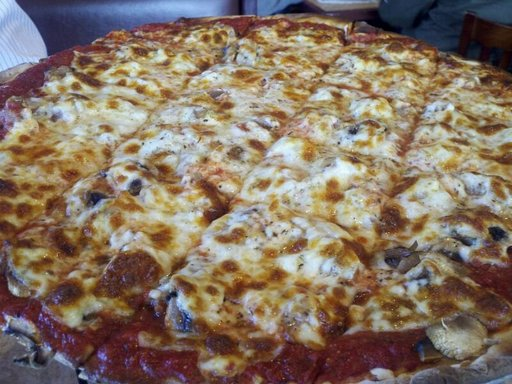

In [ ]:
# Read the image file selected at random
image = Image.open(random_image_paths)
print(f'Image Class: {class_name}')
print(f'Image Shape: {image.size}')
print(f'Image Mode: {image.mode}')
print(f'Image Format: {image.format}')
image

In [ ]:
# Get the mode of the PIL image
image_mode = image.mode
print(f"Image mode: {image_mode}")

# Determine number of channels based on mode
if image_mode == 'RGB':
    num_channels = 3
elif image_mode == 'L':
    num_channels = 1
elif image_mode == 'RGBA':
    num_channels = 4
else:
    num_channels = "Unknown"

print(f"Number of channels (based on mode): {num_channels}")

Image mode: RGB
Number of channels (based on mode): 3


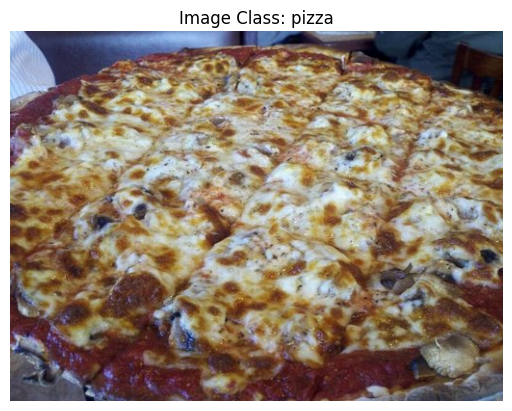

In [ ]:
# Plot the image using matplotlib
plt.imshow(image)
plt.title(f"Image Class: {class_name}")
plt.axis(False);

In [ ]:
# Convert the PIL Image to a numpy array
np_image = np.array(image)

In [ ]:
data_transform = T.Compose([
    T.Resize(size=(64,64)),
    T.RandomHorizontalFlip(p=0.5),
    T.ToTensor()
])

data_transform(image).shape

torch.Size([3, 64, 64])

# Plot the original as well as transformed image

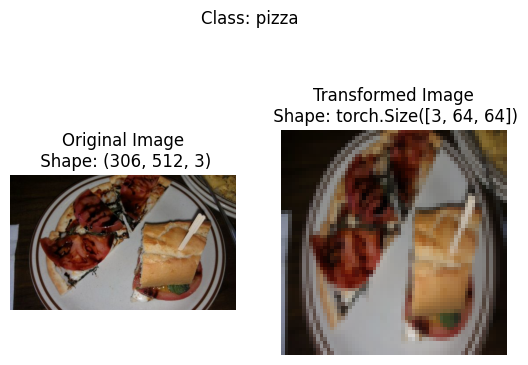

In [ ]:
random_image = random.sample(image_paths, k=1)[0]  # Extract the single path from the list
image = Image.open(random_image)
class_name = random_image.parent.name

np_image = np.array(image)
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(np_image)
plt.title(f"Original Image\n Shape: {np_image.shape}")
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(data_transform(image).permute(1,2,0))
plt.title(f"Transformed Image\n Shape: {data_transform(image).shape}")

plt.suptitle(f"Class: {class_name}")
plt.axis(False)

plt.show();

In [ ]:
from torchvision.transforms import v2

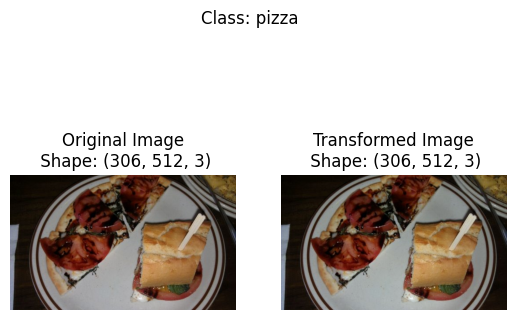

In [ ]:
transform = v2.TrivialAugmentWide(num_magnitude_bins=31)

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title(f"Original Image\n Shape: {np_image.shape}")
plt.axis(False)

transformed_image = transform(image)

plt.subplot(1,2,2)
plt.imshow(np.array(transformed_image)) # Convert to numpy array before plotting
plt.title(f"Transformed Image\n Shape: {np.array(transformed_image).shape}") # Access shape from numpy array

plt.suptitle(f"Class: {class_name}")
plt.axis(False)

plt.show();

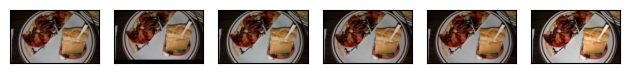

In [ ]:
from helpers import plot
transform = v2.TrivialAugmentWide()
imgs = [transform(image) for _ in range(5)]
list_image = [image] + imgs
plot(list_image)

# Create Custom Dataset

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = []

        # This will work only if the images are organized in subfolders by class
        # e.g., root_dir/class_A/image1.jpg, root_dir/class_B/image2.jpg
        for class_name in os.listdir(root_dir):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    self.image_paths.append(os.path.join(class_path, image_name))
                    self.labels.append(class_name)
                    self.class_names.append(class_name)

        # Example: Mapping class names to numerical labels
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(sorted(set(self.labels)))}
        self.numerical_labels = [self.class_to_idx[label] for label in self.labels]


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        image = Image.open(img_path).convert("RGB")
        label = self.numerical_labels[idx]
        class_name = self.class_names[idx]

        if self.transform:
            image = self.transform(image)

        return image, label, class_name


In [ ]:
# Define transformations
data_transform = v2.Compose([
    # v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create an instance of your custom dataset
train_dataset = CustomImageDataset(root_dir='/content/data/pizza_steak_sushi/train', transform=data_transform)


# Visualize random images

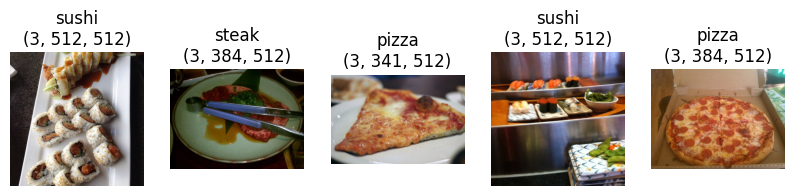

In [ ]:
selected_idx = random.choices(range(len(train_dataset)), k=5)

fig = plt.figure(figsize=(10,8))
for i in range(len(selected_idx)):
    image, label, class_name = train_dataset[selected_idx[i]]
    plt.subplot(1, len(selected_idx), i+1)
    plt.imshow(np.array(image).transpose(1,2,0))

    plt.axis(False)

    plt.title(f"{class_name}\n{np.array(image).shape}")

    # plt.text(0.5, -0.4, f"{class_name}\n{image.size}", transform=plt.gca().transAxes, ha='left', va='center')

plt.show();

In [ ]:
# Define transformations
train_transform = v2.Compose([
    v2.Resize((64, 64)),
    # v2.TrivialAugmentWide(num_magnitude_bins=31),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

# Create an instance of your custom dataset
train_dataset_custom = CustomImageDataset(root_dir='/content/data/pizza_steak_sushi/train', transform=train_transform)

test_dataset_custom = CustomImageDataset(root_dir='/content/data/pizza_steak_sushi/test', transform=test_transform)

In [ ]:
# Create DataLoader objects
batchsize = 32

train_dataloader = DataLoader(train_dataset_custom,
                              batch_size= batchsize,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(test_dataset_custom,
                              batch_size= batchsize,
                              num_workers=os.cpu_count(),
                              shuffle=False)

In [ ]:
X, y, class_names = next(iter(train_dataloader))
X, y = X.to(device), y.to(device)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: torch.Size([32, 3, 64, 64])
Shape of y: torch.Size([32])


# Build the model

In [ ]:
import torch.nn as nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  dilation=1,
                  bias=True,
                  device=device),
        nn.ReLU()
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  dilation=1,
                  bias=True,
                  device=device),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  dilation=1,
                  bias=True,
                  device=device),
        nn.ReLU()
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,
                  dilation=1,
                  bias=True,
                  device=device
    ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
              out_features=output_shape,
              device=device)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)
    x = self.conv_block_4(x)
    x = self.classifier(x)
    return x

In [ ]:
# Test the model
model = TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)

y_pred = model(X)
X.shape, y_pred.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32, 3]))

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y, class_name) in enumerate(dataloader): # Unpack three values
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y, class_name) in enumerate(dataloader): # Unpack three values
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
# Create loss and optimizers
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [ ]:
# Set number of epochs
NUM_EPOCHS = 30

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0930 | Train acc: 0.3979 | Test loss: 1.0920 | Test acc: 0.3375
Epoch: 1 | Train loss: 1.0949 | Train acc: 0.3417 | Test loss: 1.0769 | Test acc: 0.3648
Epoch: 2 | Train loss: 1.0688 | Train acc: 0.4458 | Test loss: 1.0284 | Test acc: 0.5182
Epoch: 3 | Train loss: 1.0088 | Train acc: 0.5042 | Test loss: 0.9550 | Test acc: 0.5676
Epoch: 4 | Train loss: 0.9330 | Train acc: 0.5437 | Test loss: 0.9328 | Test acc: 0.5938
Epoch: 5 | Train loss: 0.9128 | Train acc: 0.5271 | Test loss: 0.9495 | Test acc: 0.5324
Epoch: 6 | Train loss: 0.8806 | Train acc: 0.5771 | Test loss: 0.9065 | Test acc: 0.5449
Epoch: 7 | Train loss: 0.9178 | Train acc: 0.5521 | Test loss: 0.9284 | Test acc: 0.5415
Epoch: 8 | Train loss: 0.8045 | Train acc: 0.6604 | Test loss: 0.8923 | Test acc: 0.5665
Epoch: 9 | Train loss: 0.7714 | Train acc: 0.6479 | Test loss: 0.8608 | Test acc: 0.5386
Epoch: 10 | Train loss: 0.7468 | Train acc: 0.6667 | Test loss: 0.8360 | Test acc: 0.6364
Epoch: 11 | Train lo

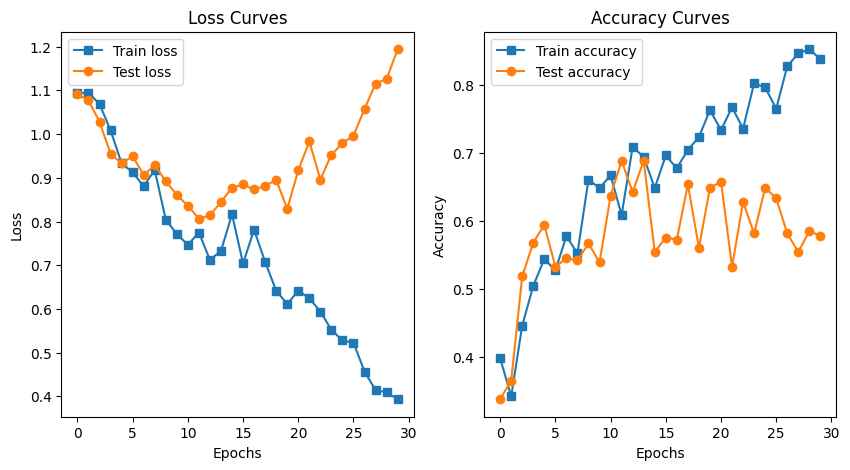

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(model_results["train_loss"], 's-',label="Train loss")
ax[0].plot(model_results["test_loss"], 'o-',label="Test loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss Curves")
ax[0].legend()

ax[1].plot(model_results["train_acc"], 's-',label="Train accuracy")
ax[1].plot(model_results["test_acc"], 'o-',label="Test accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy Curves")
ax[1].legend()

plt.show();

# Download an image from internet to test through the model

In [ ]:
target_path = data_dir/'image.jpg'

if target_path.is_file():
  print(f"{target_path} already exists - deleting")
  os.remove(target_path)

with open(target_path, "wb") as f:
  r = requests.get('https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/perfect_steak_and_chips_14714_16x9.jpg')
  # print(r.status_code, r.headers.get('content_type'))
  print(f"Downloading {target_path}")
  f.write(r.content)


/content/data/image.jpg already exists - deleting


In [ ]:
# Read the image loaded

target_img_downlaoded = decode_image(target_path).float()

target_img_downlaoded.shape


torch.Size([3, 468, 832])

In [ ]:
# Tansform the image to 64x64
img_resized = v2.Resize((64,64))(target_img_downlaoded)

img_resized.shape


torch.Size([3, 64, 64])

# Make predictions on the doenloaded image

In [ ]:
model.to(device)
model.eval()

img_resized = img_resized.unsqueeze(0).to(device)
img_resized = img_resized.to(device)

print(img_resized.shape)

with torch.inference_mode():
  y_pred = model(img_resized)
  y_pred_probs = torch.softmax(y_pred, dim=1)
  y_pred_label = torch.argmax(y_pred_probs, dim=1)

y_pred_label.item()

torch.Size([1, 3, 64, 64])


1